In [3]:
import nltk
import gensim
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re

In [ ]:
nltk.download()

In [4]:
corups = [
    "my name is raj dalsaniya .",
    "i love to learn all the data science along with ops and cloud !",
    "fsf sskfdkgjfeijirdji mfdnidfjiejk 173984729#2fifi ndjikm^",
    "nlp is very very amazing",
    "We are trying to learn word2vec,",
    "We will try to build two models for word2vec cbow and skipgram",
    "we will also work on cleaning the data which is basically part of data preprocessing",
    "natural language processing is a part of AI,",
    "my phone number is 9408332091",
    "wor2vec is being used for word embeddings.",
    "it is going to perform better then one hot-encoding, bow or TF-IDF"
]

In [9]:
s = "my name is raj dalsaniya 453 54345  ."
s.lower()

'my name is raj dalsaniya 453 54345  .'

In [10]:
re.sub(r'\d+',"",s)

'my name is raj dalsaniya    .'

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
s.translate(str.maketrans("","",string.punctuation))

'my name is raj dalsaniya 453 54345  '

In [14]:
s1 = word_tokenize(s)

In [15]:
s1

['my', 'name', 'is', 'raj', 'dalsaniya', '453', '54345', '.']

In [16]:
[ i for i in s1 if i not in stopwords.words('english')]

['name', 'raj', 'dalsaniya', '453', '54345', '.']

In [17]:
def word_prepprocessing(text) :
    text = text.lower()
    text = re.sub(r'\d+',"",text)
    text = text.translate(str.maketrans("","",string.punctuation))
    word = word_tokenize(text)
    word = [ i for i in word if i not in stopwords.words('english')]
    return word 

In [19]:
corups

['my name is raj dalsaniya .',
 'i love to learn all the data science along with ops and cloud !',
 'fsf sskfdkgjfeijirdji mfdnidfjiejk 173984729#2fifi ndjikm^',
 'nlp is very very amazing',
 'We are trying to learn word2vec,',
 'We will try to build two models for word2vec cbow and skipgram',
 'we will also work on cleaning the data which is basically part of data preprocessing',
 'natural language processing is a part of AI,',
 'my phone number is 9408332091',
 'wor2vec is being used for word embeddings.',
 'it is going to perform better then one hot-encoding, bow or TF-IDF']

In [21]:
processed_corpus = [word_prepprocessing(sentence) for sentence in corups]

In [22]:
processed_corpus

[['name', 'raj', 'dalsaniya'],
 ['love', 'learn', 'data', 'science', 'along', 'ops', 'cloud'],
 ['fsf', 'sskfdkgjfeijirdji', 'mfdnidfjiejk', 'fifi', 'ndjikm'],
 ['nlp', 'amazing'],
 ['trying', 'learn', 'wordvec'],
 ['try', 'build', 'two', 'models', 'wordvec', 'cbow', 'skipgram'],
 ['also',
  'work',
  'cleaning',
  'data',
  'basically',
  'part',
  'data',
  'preprocessing'],
 ['natural', 'language', 'processing', 'part', 'ai'],
 ['phone', 'number'],
 ['worvec', 'used', 'word', 'embeddings'],
 ['going', 'perform', 'better', 'one', 'hotencoding', 'bow', 'tfidf']]

In [23]:
word2vec_cbow = Word2Vec(sentences=processed_corpus ,vector_size=100 , window=10,min_count=1,sg=0)
word2vec_skipgram = Word2Vec(sentences=processed_corpus ,vector_size=100 , window=10,min_count=1,sg=1)

In [24]:
word2vec_cbow

In [25]:
word2vec_skipgram

In [26]:
word2vec_skipgram.vector_size

100

In [27]:
word2vec_cbow.wv['nlp']

array([ 7.0887972e-03, -1.5679300e-03,  7.9474989e-03, -9.4886590e-03,
       -8.0294991e-03, -6.6403709e-03, -4.0034545e-03,  4.9892161e-03,
       -3.8135587e-03, -8.3199050e-03,  8.4117772e-03, -3.7470020e-03,
        8.6086961e-03, -4.8957514e-03,  3.9185942e-03,  4.9220170e-03,
        2.3926091e-03, -2.8188038e-03,  2.8491246e-03, -8.2562361e-03,
       -2.7655398e-03, -2.5911583e-03,  7.2490061e-03, -3.4634031e-03,
       -6.5997029e-03,  4.3404270e-03, -4.7448516e-04, -3.5975564e-03,
        6.8824720e-03,  3.8723124e-03, -3.9002013e-03,  7.7188847e-04,
        9.1435025e-03,  7.7546560e-03,  6.3618720e-03,  4.6673026e-03,
        2.3844899e-03, -1.8416261e-03, -6.3712932e-03, -3.0181051e-04,
       -1.5653884e-03, -5.7228567e-04, -6.2628710e-03,  7.4340473e-03,
       -6.5914928e-03, -7.2392775e-03, -2.7571463e-03, -1.5154004e-03,
       -7.6357173e-03,  6.9824100e-04, -5.3261113e-03, -1.2755442e-03,
       -7.3651113e-03,  1.9605684e-03,  3.2731986e-03, -2.3138524e-05,
      

In [31]:
word2vec_cbow.wv.similarity("nlp",'cbow')


0.10198017

In [32]:
word2vec_cbow.wv.most_similar_cosmul('raj',topn = 3)

[('fsf', 0.5980187654495239),
 ('wordvec', 0.5943545699119568),
 ('going', 0.5712200403213501)]

In [33]:
word2vec_cbow.wv['nlp']

array([ 7.0887972e-03, -1.5679300e-03,  7.9474989e-03, -9.4886590e-03,
       -8.0294991e-03, -6.6403709e-03, -4.0034545e-03,  4.9892161e-03,
       -3.8135587e-03, -8.3199050e-03,  8.4117772e-03, -3.7470020e-03,
        8.6086961e-03, -4.8957514e-03,  3.9185942e-03,  4.9220170e-03,
        2.3926091e-03, -2.8188038e-03,  2.8491246e-03, -8.2562361e-03,
       -2.7655398e-03, -2.5911583e-03,  7.2490061e-03, -3.4634031e-03,
       -6.5997029e-03,  4.3404270e-03, -4.7448516e-04, -3.5975564e-03,
        6.8824720e-03,  3.8723124e-03, -3.9002013e-03,  7.7188847e-04,
        9.1435025e-03,  7.7546560e-03,  6.3618720e-03,  4.6673026e-03,
        2.3844899e-03, -1.8416261e-03, -6.3712932e-03, -3.0181051e-04,
       -1.5653884e-03, -5.7228567e-04, -6.2628710e-03,  7.4340473e-03,
       -6.5914928e-03, -7.2392775e-03, -2.7571463e-03, -1.5154004e-03,
       -7.6357173e-03,  6.9824100e-04, -5.3261113e-03, -1.2755442e-03,
       -7.3651113e-03,  1.9605684e-03,  3.2731986e-03, -2.3138524e-05,
      

In [34]:
word2vec_cbow.wv.similarity('nlp','ai')

-0.24784131

In [36]:
word2vec_cbow.wv.index_to_key

['data',
 'wordvec',
 'learn',
 'part',
 'tfidf',
 'mfdnidfjiejk',
 'build',
 'try',
 'trying',
 'amazing',
 'nlp',
 'ndjikm',
 'fifi',
 'sskfdkgjfeijirdji',
 'models',
 'fsf',
 'cloud',
 'ops',
 'along',
 'science',
 'love',
 'dalsaniya',
 'raj',
 'two',
 'cbow',
 'bow',
 'number',
 'hotencoding',
 'one',
 'better',
 'perform',
 'going',
 'embeddings',
 'word',
 'used',
 'worvec',
 'phone',
 'skipgram',
 'ai',
 'processing',
 'language',
 'natural',
 'preprocessing',
 'basically',
 'cleaning',
 'work',
 'also',
 'name']

In [40]:
word2vec_cbow.wv.most_similar('nlp',topn =5)

[('basically', 0.26852744817733765),
 ('worvec', 0.14284475147724152),
 ('fifi', 0.12813477218151093),
 ('ndjikm', 0.10941850394010544),
 ('try', 0.10886834561824799)]

In [41]:
word2vec_skipgram.wv.most_similar('nlp',topn=5)

[('basically', 0.26862025260925293),
 ('worvec', 0.14284475147724152),
 ('fifi', 0.12813477218151093),
 ('ndjikm', 0.10941850394010544),
 ('try', 0.10902611911296844)]

In [44]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [54]:
word_vector = word2vec_cbow.wv
vocab = list(word_vector.index_to_key)

In [56]:
len(vocab)

48

In [59]:
x = np.array([word_vector[i] for i in vocab])

In [62]:
tsne = TSNE(n_components=2)

In [64]:
x_new_embedding = tsne.fit_transform(x)

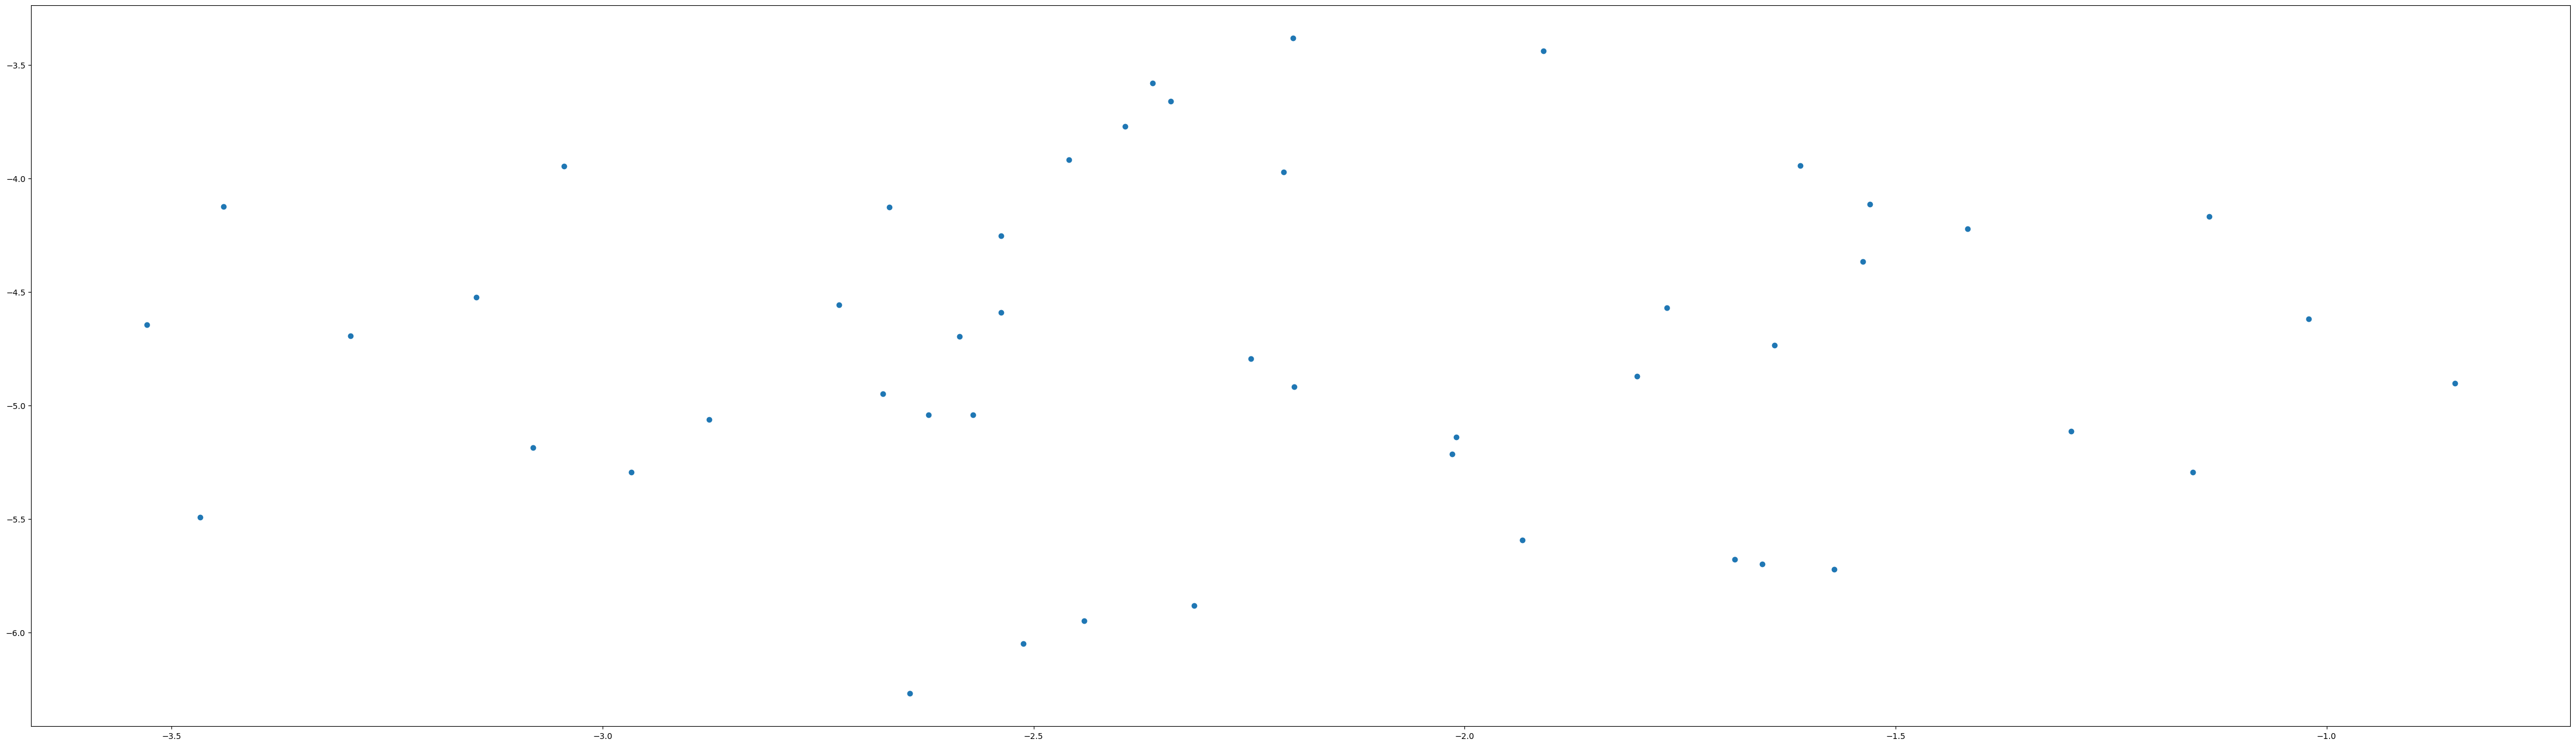

In [68]:
plt.figure(figsize=(56,16))
plt.scatter(x_new_embedding[:,0],x_new_embedding[:,1], marker = 'o')
plt.show()


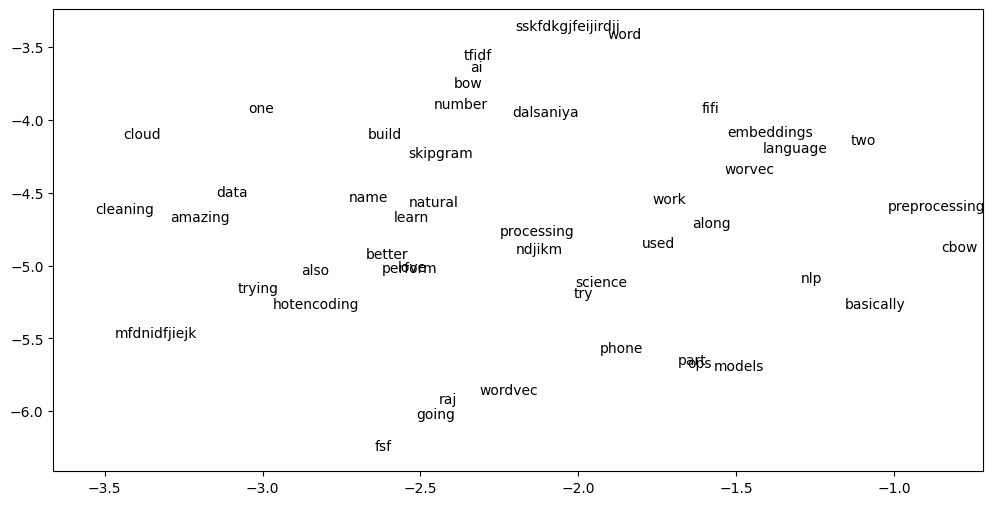

In [73]:
plt.figure(figsize=(12,6))
plt.scatter(x_new_embedding[:,0],x_new_embedding[:,1], marker = '')
for i,words in enumerate(vocab[:len(x_new_embedding)]):
    plt.annotate(words,xy=(x_new_embedding[i,0],x_new_embedding[i,1]))
plt.show()

In [74]:
text = "my name is raj dalsaniya, i am working with mitsubish electric. where i work with emebedded system , AI and machine learning."

In [77]:
token_word = word_tokenize(text)

In [81]:
from nltk import ne_chunk
from nltk import pos_tag

In [83]:
pip install svgling

Note: you may need to restart the kernel to use updated packages.


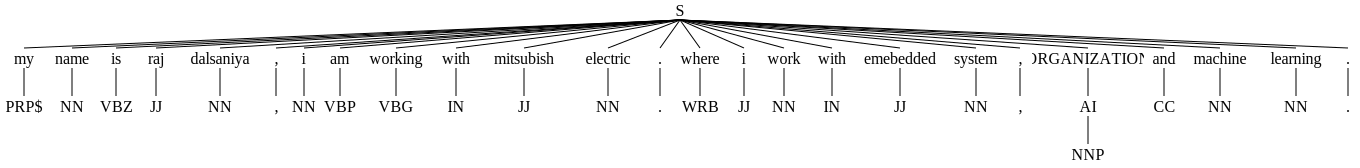

In [ ]:
# Apply part-of-speech tagging to the tokens
tagged = nltk.pos_tag(token_word)
nltk.chunk.ne_chunk(tagged)